<img src = "../imgs/Banner_Logo.JPEG"/>



# <center> 05. Introduction to Image classification! </center>


## <span style="color:red"> Outline </span> 
1. **Images classification and recognition**
2. **Image similarity:Content-based image retrieval**
3. **KNN simple classification**

## A complex problem !

### Labradoodle or fried chicken ?  
<img src="../imgs/complex1.png" style="width:500px;heigth:100px">

### Sheepdog or mop ?
<img src="../imgs/complex3.png" style="width:500px;heigth:100px">

### Chihuahua or muffin ?

<img src="../imgs/complex4.png" style="width:500px;heigth:100px">


In [45]:
import cv2 as cv
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [46]:
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()
number_to_class_dict = {0:"T_shirt" , 1:"Trousers" , 2:"Pullover" ,3:"Dress" ,4:"Coat" ,5:"Sandal",
                        6: "Shirt", 7: "Sneaber", 8: "Bag", 9: "Ankle boot" }

## <span style="color:red"> 1. Images classification and recognition </span> 

The classification is the problem of predicting a discrete class label output for an example.

**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t) = \left \{ x_1, x_2, \ldots x_n  \right \}$ is input data, while $y(t) = \left \{0,1,2, ... , c \right \}$ is output data. For classification, $y(t)$ are discrete output variables.



Charge the MNIST FASHION dataset which includes 10 Clothes cathegories!


#### Looks simple ...and we have many features: shape, geometry, among others!

In [47]:
print("There is a total of {} samples in our dataset.".format(len(trainY)))
n_classes = 10
for i in range (n_classes):
    class_name = number_to_class_dict[i]
    number_of_samples = len(trainY[trainY == i])
    print("Class: {}-{} has {} number of samples.".format(i,class_name,number_of_samples))

There is a total of 60000 samples in our dataset.
Class: 0-T_shirt has 6000 number of samples.
Class: 1-Trousers has 6000 number of samples.
Class: 2-Pullover has 6000 number of samples.
Class: 3-Dress has 6000 number of samples.
Class: 4-Coat has 6000 number of samples.
Class: 5-Sandal has 6000 number of samples.
Class: 6-Shirt has 6000 number of samples.
Class: 7-Sneaber has 6000 number of samples.
Class: 8-Bag has 6000 number of samples.
Class: 9-Ankle boot has 6000 number of samples.


### Visualize
Now we going to select and visualize  random image subsets to dimension the problem! 

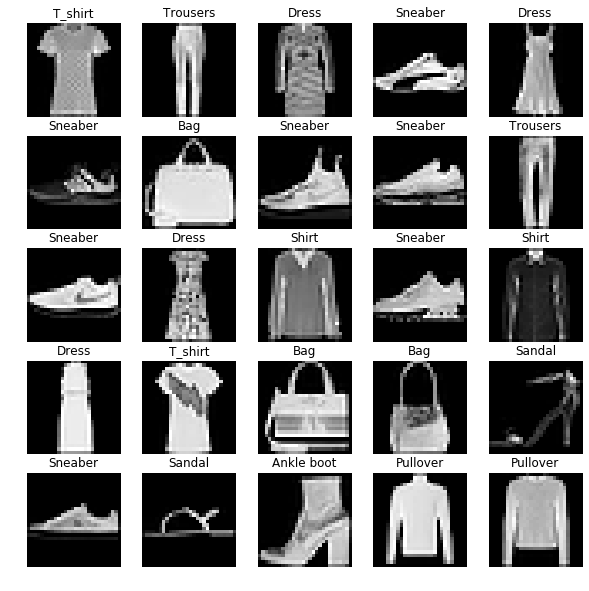

In [48]:
rows = 5
cols = 5
Nsamples = rows*cols
sample_indexes = np.random.randint(low=0 , high= len(trainX), size = Nsamples)
plt.figure(figsize=(10,10))

for i in range (Nsamples):
    plt.subplot(rows,cols,(i+1))
    index = sample_indexes[i]
    image_i = trainX[index]
    class_i = trainY[index]
    plt.axis('off')
    plt.imshow(image_i, cmap='gray')
    plt.title(number_to_class_dict[class_i])
    

#### Anyway go to the action and always try!

## <span style="color:red"> 2. Image similarity: Content-based image retrieval
 </span> 

Assume that you have a new image, but **you dont know** the corresponding label class. Then you will assign the class of the closer image in a dataset. 

The first step to compare images is measure the degree of **SIMILARITY** among them. 

- Images are numerical vectors, so we can measure difference among pixels using any metric. 
    - For instance the well know  **Euclidean metric**
    $$d(u,v) = \left \| u -v \right \|_2 = \sqrt {\left (  \sum \left ( u_i -v_i )^{2} \right )\right )}$$

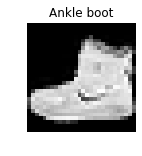

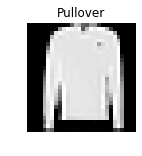

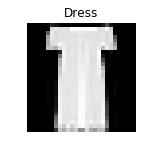

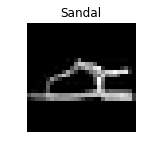

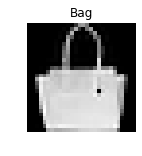

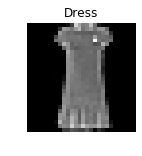

In [49]:
indexes = np.random.randint(low = 0 , high = len(trainY), size = 5)
imageB = trainX[0]
labelB = trainY[0]
image1 = trainX[indexes[0]]
label1 = trainY[indexes[0]]
image2 = trainX[indexes[1]]
label2 = trainY[indexes[1]]
image3 = trainX[indexes[2]]
label3 = trainY[indexes[2]]
image4 = trainX[indexes[3]]
label4 = trainY[indexes[3]]
image5 = trainX[indexes[4]]
label5 = trainY[indexes[4]]
image_list = [imageB, image1, image2, image3, image4, image5]
class_list = [labelB, label1, label2, label3, label4, label5]
for i in range (len(image_list)):
    plt.figure(figsize=(2,2))
    image_i = image_list[i]
    class_i = class_list[i]
    plt.imshow(image_i, cmap='gray')
    plt.axis('off')
    plt.title(number_to_class_dict[class_i])
    height, width = image_i.shape

Now we measure, using `scipy` we can define several distances. The basic one is the Euclidean distance

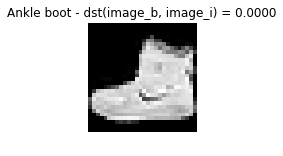

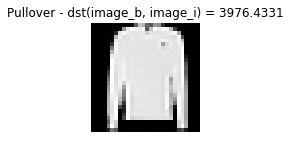

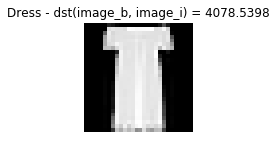

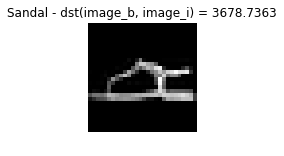

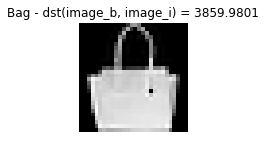

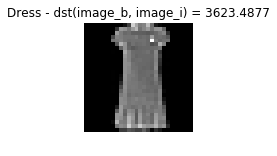

In [50]:
from scipy.spatial import distance

imageB_flatten = np.reshape(imageB, newshape= (width*height,1))

for i in range (len(image_list)):
    plt.figure(figsize=(2,2))
    image_i = image_list[i]
    image_i_flatten = np.reshape(image_i, newshape=((width*height,1)))
    class_i = class_list[i]
    plt.imshow(image_i, cmap='gray')
    plt.axis('off')
    dst_i = distance.euclidean(imageB_flatten, image_i_flatten)
    plt.title("{} - dst(image_b, image_i) = {:.4f}".format(number_to_class_dict[class_i],dst_i))
    height, width = image_i.shape

Text(0.5, 1.0, 'Ankle boot - dst(image_b, image_i) = 3044.7511')

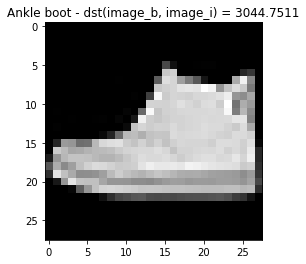

In [51]:
index = 10
image_Ankleboot = trainX[trainY == 9] [index]
image_Ankleboot_flatten = np.reshape(image_Ankleboot, newshape=(width*height,1))
plt.imshow(image_Ankleboot,cmap='gray')
class_i = 9
dst_i = distance.euclidean(imageB_flatten, image_Ankleboot_flatten)
plt.title("{} - dst(image_b, image_i) = {:.4f}".format(number_to_class_dict[class_i],dst_i))

## <span style="color:orange"> Student Challenge </span>: 

- 1. Try with complete set of three classes. Which is the closest?

- 2. The results change with other metrics of **Similarity**?
    - Try with cosine distance [[2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine)]
    
    $$1 - \frac{u \cdot v}{\left \| u \right \|_2 \left \| v \right \|_2}$$
    
    - Try with correlation distance [[3](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation)]
    
    $$1 - \frac{(u - \mu_u ) \cdot (v -\mu_v)}{\left \| (u - \mu_u ) \right \|_2 \left \| (v -\mu_v) \right \|_2}
$$

## <span style="color:red"> 3. KNN simple classificaion </span> 

It is one of the simplest of classification algorithms available for supervised learning. The idea is to search for closest match of the test data in feature space. 

<img src="../imgs/classification_1.png" style="width:500px;heigth:100px">

### The main steps of the KNN algorithm

1. Calculate the distance between the new point and every other point
    - Sort the distances
2. Pick K minimum distances from the list of sorted distances
3. Use majority voting to get the color of the point

<img src="../imgs/classification_2.png" style="width:800px;heigth:100px">

#### Go to the actions!

Firstly check the shape of your train and test folds.

In [52]:
print(trainX.shape)
print(trainY.shape)

(60000, 28, 28)
(60000,)


In [53]:
print(testX.shape)
print(testY.shape)
print(testY[:10])
print([number_to_class_dict[i] for i in testY[:10]])


(10000, 28, 28)
(10000,)
[9 2 1 1 6 1 4 6 5 7]
['Ankle boot', 'Pullover', 'Trousers', 'Trousers', 'Shirt', 'Trousers', 'Coat', 'Shirt', 'Sandal', 'Sneaber']


In [54]:
train_samples = 10000
test_samples = 2000
trainX_flatten = np.reshape(trainX, newshape=(len(trainX),width*height))
testX_flatten = np.reshape(testX, newshape=(len(testX),width*height))
trainX_flatten = trainX_flatten[:train_samples]
trainY = trainY[:train_samples]
testX_flatten = testX_flatten[: test_samples]
testY = testY[:test_samples]
print(trainX_flatten.shape)
print(testX_flatten.shape)

(10000, 784)
(2000, 784)


In [61]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)
model.fit(trainX_flatten, trainY)
accuracy_train = model.score(trainX_flatten,trainY)
accuracy_test = model.score(testX_flatten, testY)
print("The accuracy on training is : {:.4f}%".format(accuracy_train*100))
print("The accuracy on testing is : {:.4f}%".format(accuracy_test*100))

The accuracy on training is : 81.6700%
The accuracy on testing is : 80.5000%


Very important to understand results!

In [60]:
from sklearn.metrics import confusion_matrix
train_prediction = model.predict(trainX_flatten)
test_prediction = model.predict(testX_flatten)

cm_train=confusion_matrix(trainY, train_prediction)
cm_test = confusion_matrix(testY, test_prediction)
("=====================================================================================")
print("Confusion Matrix in training")
print (cm_train)
print("=====================================================================================")
print("Confusion Matrix in testing")
print (cm_test)


Confusion Matrix in training
[[804   1  20  45   5   0  59   0   8   0]
 [  8 970  19  19   4   0   7   0   0   0]
 [ 14   0 740   2 130   0 125   2   3   0]
 [ 57  11  13 874  43   0  20   0   1   0]
 [  7   1 126  26 714   0  99   0   1   0]
 [  2   0   2   1   0 744   7 147   5  81]
 [229   1 140  24  90   0 519   0  17   1]
 [  0   0   0   0   0   5   0 943   0  74]
 [  5   0  25  15  11   3  20  14 893   4]
 [  0   0   0   0   0   5   6  23   0 966]]
Confusion Matrix in testing
[[170   0   3  10   2   0  14   0   1   0]
 [  2 190   1   8   1   0   1   0   0   0]
 [  3   0 159   0  28   0  24   0   0   0]
 [  8   3   1 160  10   0   7   0   1   0]
 [  0   1  33   5 147   0  32   0   1   0]
 [  0   0   0   1   0 137   3  35   1  18]
 [ 35   0  26   5  16   0 112   1   2   0]
 [  0   0   0   0   0   0   0 181   0  19]
 [  2   0   5   1   2   1   6   2 175   0]
 [  0   0   0   0   0   0   1   8   0 179]]


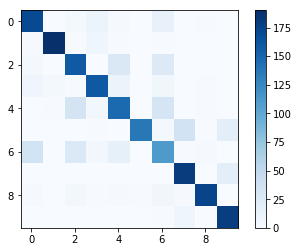

In [58]:
plt.imshow(cm_test, interpolation="nearest", cmap=plt.cm.Blues);
plt.colorbar();

## <span style="color:orange"> Student Challenge </span>: 

- Which is your score?
- What about classify videos?


# References

 [1 Fashion Mnist](https://www.kaggle.com/zalando-research/fashionmnist)
 
 [[2 Cosine distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cosine.html#scipy.spatial.distance.cosine)]

[[3 Correlation distance](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.correlation.html#scipy.spatial.distance.correlation)]

<img src="../imgs/bannerThanks.jpg" style="width:1000px;">